In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.manifold import Isomap
import pandas as pd

In [6]:
def FonctionImportDonnees(chemin):
    """
        importe les données du fichier excel, après expertise
    """
    donnees=pd.ExcelFile(chemin).parse(1) #Sélectionne la première feuille
    donnees=donnees.drop(index=[960,952]) #Supprime les lignes avec trop de NA
    donnees=donnees.drop('5°C T50 (h)',axis=1).drop('5°C T50 (j)',axis=1).drop('5°C TMG (h)',axis=1) #Supprime les colonnes avec information identique, ou avec trop de NA
    
    liste=[]
    col={}
    j=0
    
    for i in range(10,16): #Expertise: création des données de croissance
        a=donnees.columns[i]
        b=donnees.columns[i+1]
        liste.append(donnees[b]-donnees[a])
        c='v'+a+'-'+b
        col[j]=c.replace(' ','')
        j=j+1
    croissance=pd.DataFrame(liste).T
    croissance=croissance.rename(col, axis='columns')
    donnees=pd.concat([donnees,croissance],axis=1).dropna()
    donnees.set_index('rep')
    
    donnees=donnees[['Bancs', 'Pop', 'Echantillon', 'rep', 'N° rep', 'camera', 'semis','zone', '5°C TMG (j)', 'Aire sous la courbe', 'v15j-16j', 'v16j-17j', 'v17j-18j','v18j-19j', 'v19j-20j', 'v20j-21j']]
    
    quanti=['5°C TMG (j)', 'Aire sous la courbe', 'v15j-16j', 'v16j-17j', 'v17j-18j','v18j-19j', 'v19j-20j', 'v20j-21j']
    quali=['Bancs', 'Pop', 'N° rep', 'camera', 'semis','zone']
    
    return donnees,quanti,quali

#IMPORTATION DES DONNEES EXPERTISEES
donnees,quanti,quali = FonctionImportDonnees("https://raw.githubusercontent.com/etudiantdatascience/TER-reduction-dimension/master/Data/semis.xlsx")


In [7]:
### ISOMAP ###

labels = donnees.iloc[:, [0,1,4,5,6,7]] # labels = variables qualitatives
features = donnees.iloc[:, 8:16] # features = variables quantitatives
        

"""
 On va ici utiliser la méthode Isomap, en important le module Isomap de la classe manifold
 de la bibliothèque sklearn.

 Le but est de se ramener à un espace de 2 ou 3 dimensions tout en préservant
 les distances géodésiques (plus courte distance entre deux points sur une surface quelconque) 
 entre les points.
 Pour cela, on va choisir k = nombre de voisins et calculer la matrice des distances 
 géodésiques entre chaque point et ses k voisins. 
 L'algorithme effectue ensuite une décomposition en éléments propres de la matrice. 
 La réduction de dimension se fait à partir des valeurs propres significatives.

 Questions : - comment choisir k ?
             - comment se passe la dernière étape ? (à partir des valeurs propres)



 La fonction utilisée par python est la suivante :
 sklearn.manifold.Isomap(n_neighbors=5, n_components=2, 
                        eigen_solver=’auto’, tol=0, max_iter=None, 
                        path_method=’auto’, neighbors_algorithm=’auto’, n_jobs=None)

 EXPLICATION DES PARAMETRES
 n_neighbors = nombre de voisins à considérer pour chaque point
 n_components = nombre de dimensions auquel on veut réduire notre espace de variables
 eigen_solver = méthode de décomposition en éléments propres souhaitée (par défaut = 'auto', 
                utilise la méthode la plus adaptée) 
 tol et max_iter : dépendent du choix de eigen_solver si == 'dense'
 path_method = méthode utilisée pour trouver le plus court chemin/distance géodésique, par exemple Dijkstra
               (par défaut = 'auto', utilise la méthode la plus adaptée)
 neighbors_algorithm = algorithme utilisée pour la recherche des plus proches voisins
                       (par défaut = 'auto', utilise la méthode la plus adaptée)
 n_jobs = entier utilisé pour indiquer quelle quantité de mémoire on souhaite 
          utiliser pour faire tourner l'algorithme
"""
             

# Utilisation de la fonction Isomap expliquée plus haut. On choisit de réduire à 2 dimensions.
isomap = Isomap(n_neighbors = 15, n_components = 3)

"""
On applique isomap sur nos données à l'aide de la méthode fit_transform, qui prend en paramètre nos données
(ici features) et qui renvoie une matrice avec le même nombre de lignes mais avec un nombre de colonnes
réduit à la dimension souhaitée.
"""

features_transformed = isomap.fit_transform(features)

for variableQuali in quali:
    valeur = donnees[variableQuali].drop_duplicates().values
    donnees[variableQuali] = donnees[variableQuali].replace(valeur,list(range(len(valeur))))


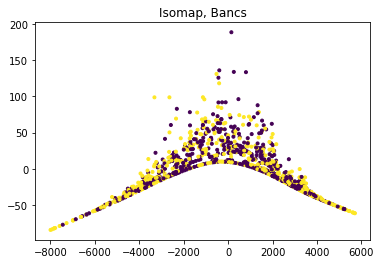

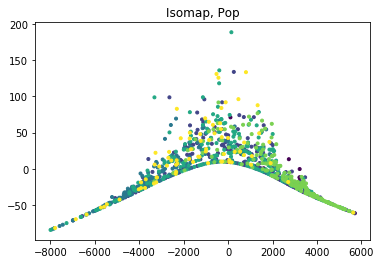

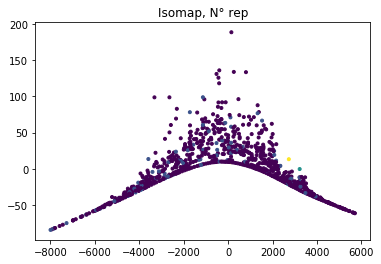

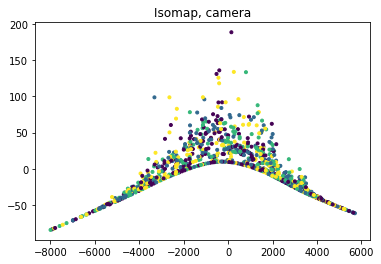

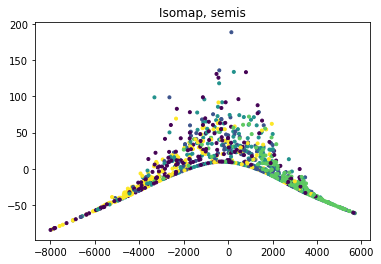

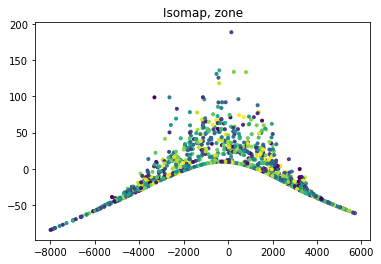

In [9]:
# On affiche sur un graphe nos résultats
for i in quali:
    plt.scatter(features_transformed[:, 0], features_transformed[:, 1], marker='.', c=donnees[i])
    plt.title("Isomap, " + str(i))
    plt.show()